In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit.source.catalog import ArrayCatalog
from nbodykit import setup_logging, style

import os
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np

In [3]:
setup_logging() # turn on logging to screen

In [4]:
#redshift = 0.5
#cosmo = cosmology.Planck15
LBox = 1024.0
Nparticles = 1024*1024*1024
print(Nparticles)

1073741824


In [5]:
# define download dir for the data to the current directory
download_dir = "../../../../halo_catalogues/F6/box1/27"
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256_testing/F5/box5001/output/."
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256/F5/box5001/output/."
#download_dir = "./gadget_data_27"

In [6]:
# NOTE: change this path if you downloaded the data somewhere else!
data_path = os.path.join(download_dir, 'Rockstar_M200c_F6_B1_B1024_NP1024_S27.dat')
#data_path = os.path.join(download_dir, 'snapshot_z0p000.*')
#data_path = os.path.join(download_dir, 'gadget.*')


# initialize the Gadget1 catalog objects for data and randoms
#data = Gadget1Catalog(data_path)

# Reading file
inputFile = np.loadtxt(data_path)

massvec=inputFile[:,2]
npvec=inputFile[:,7]
xvec=inputFile[:,8]
yvec=inputFile[:,9]
zvec=inputFile[:,10]
nval=massvec.shape[0]
npvecsum = np.sum(npvec)
print(nval)
print(npvecsum)
print(npvecsum/Nparticles)

#for i in range(0,nval):
#    xvec[i] = xvec[i]/LBox
#    yvec[i] = yvec[i]/LBox
#    zvec[i] = zvec[i]/LBox

arraya=np.array([xvec,yvec,zvec])
arrayb=np.transpose(arraya)
print arrayb

# generate the fake data
#data = numpy.empty(1024, dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
#data['Position'] = numpy.random.random(size=(1024, 3))
#data['Mass'] = numpy.random.random(size=1024)

data = numpy.empty(nval, dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
data['Position'] = arrayb
data['Mass'] = massvec


print(data['Mass'])
print(data['Position'])



2088610
272286591.0
0.2535866489633918
[[   5.05451   27.90979    7.1484 ]
 [   3.33114    2.02789    8.77102]
 [   6.93523   23.87998    3.54353]
 ...
 [1012.35187 1023.24255 1010.75012]
 [1018.56238 1010.28809 1012.22632]
 [1017.27716 1014.47455 1012.68018]]
[2.886e+12 3.665e+12 1.404e+12 ... 2.418e+12 1.560e+11 2.184e+12]
[[   5.05451   27.90979    7.1484 ]
 [   3.33114    2.02789    8.77102]
 [   6.93523   23.87998    3.54353]
 ...
 [1012.35187 1023.24255 1010.75012]
 [1018.56238 1010.28809 1012.22632]
 [1017.27716 1014.47455 1012.68018]]


We can analyze the available columns in the catalogs via the ``columns`` attribute:

In [7]:
#print('data columns = ', data.columns)
# save to a npy file
numpy.save("npy-data.npy", data)

data = numpy.load("npy-data.npy")

# initialize the catalog
f = ArrayCatalog(data)

print(f)
print("columns = ", f.columns) # default Weight,Selection also present
print("total size = ", f.csize)


f = ArrayCatalog({'Position' : data['Position'], 'Mass' : data['Mass'] })

print(f)
print("columns = ", f.columns) # default Weight,Selection also present
print("total size = ", f.csize)

ArrayCatalog(size=2088610)
('columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Weight'])
('total size = ', 2088610)
ArrayCatalog(size=2088610)
('columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Weight'])
('total size = ', 2088610)


In [8]:
#ri = 0.01
#rf = 100.0
#Nr = 30
#dr = (rf-ri)/int(Nr)
#redges = np.arange(ri,rf,dr)
##edges = numpy.linspace(0.1, 10., 20+1) # 20 total bins
#print(redges)
##MyBoxSize1 = data.attrs['MyBoxSize']

In [9]:
#r = SimulationBox2PCF(mode='1d',data1=f,edges=redges,BoxSize=[LBox,LBox,LBox],periodic=True,position='Position')

In [10]:
#print(r)
#print(r.D1D2)
#tpcf=r.D1D2
#print(tpcf.coords)

In [11]:
#rvec=tpcf['r']
#tpcfvec=tpcf['npairs'].real
#
##print(kvec[3])
##print(pkvec[3])
#
#nr = rvec.shape[0]
#
#print(nr)
#
#tpcfa=np.array([rvec,tpcfvec])
#tpcfb=np.transpose(tpcfa)
#print tpcfb
#
#np.savetxt('tpcf.txt',tpcfb,delimiter='\t',newline='\r\n')

In [12]:
## print out the meta-data
#for r in tpcf.attrs:
#    print("%s = %s" %(r, str(tpcf.attrs[r])))

In [13]:
#fig0 = plt.figure()
#
## print the shot noise subtracted P(k)
#plt.plot(tpcf['r'], tpcf['npairs'])
##plt.loglog(Pk['k'], Pk['power'].real)
#
#
## format the axes
#plt.xlabel(r"$r$ [$h \ \mathrm{Mpc}^{-1}$]")
#plt.ylabel(r"$\chi$ [$h^{-3}\mathrm{Mpc}^3$]")
##plt.xlim(0.001, 0.6)
##plt.xlim(0.01, 10.0)
##plt.ylim(1,100000)
#
##fig1.savefig("plot.pdf")

In [14]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh:: tsc or cic
#mesh = data.to_mesh(resampler='tsc', Nmesh=512, compensated=True, position='Position')
#mesh = data.to_mesh(resampler='tsc', Nmesh=1024, compensated=True, position='Position')
#mesh = data.to_mesh(resampler='tsc', Nmesh=1024, compensated=True, position='Position',weight='Mass',interlaced=True)
mesh = f.to_mesh(resampler='tsc', BoxSize=LBox, Nmesh=1024, compensated=True, position='Position',weight='Mass',interlaced=True)

In [15]:
print("mesh = ", mesh)

('mesh = ', (ArrayCatalog(size=2088610) as CatalogMesh))


In [16]:
# compute the power, specifying desired linear k-binning
#r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.01)
rr = FFTPower(mesh, mode='1d', dk=0.01, kmin=0.001)

[ 000126.62 ]   0: 10-17 08:48  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 2088610 
[ 000128.89 ]   0: 10-17 08:48  CatalogMesh     INFO     painted 2088610 out of 2088610 objects to mesh
[ 000234.70 ]   0: 10-17 08:50  CatalogMesh     INFO     painted 2088610 out of 2088610 objects to mesh
[ 000234.71 ]   0: 10-17 08:50  CatalogMesh     INFO     mean particles per cell is 1.20085e+10
[ 000234.72 ]   0: 10-17 08:50  CatalogMesh     INFO     sum is 1.28941e+19 
[ 000235.84 ]   0: 10-17 08:50  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000259.48 ]   0: 10-17 08:50  CatalogMesh     INFO     field: (ArrayCatalog(size=2088610) as CatalogMesh) painting done


In [17]:
# the result is stored at "power" attribute
Pk = rr.power
print(rr)
print(Pk)

<BinnedStatistic: dims: (k: 314), variables: ('k', 'power', 'modes')>


In [18]:
print(Pk.coords)

{'k': array([0.006, 0.016, 0.026, 0.036, 0.046, 0.056, 0.066, 0.076, 0.086,
       0.096, 0.106, 0.116, 0.126, 0.136, 0.146, 0.156, 0.166, 0.176,
       0.186, 0.196, 0.206, 0.216, 0.226, 0.236, 0.246, 0.256, 0.266,
       0.276, 0.286, 0.296, 0.306, 0.316, 0.326, 0.336, 0.346, 0.356,
       0.366, 0.376, 0.386, 0.396, 0.406, 0.416, 0.426, 0.436, 0.446,
       0.456, 0.466, 0.476, 0.486, 0.496, 0.506, 0.516, 0.526, 0.536,
       0.546, 0.556, 0.566, 0.576, 0.586, 0.596, 0.606, 0.616, 0.626,
       0.636, 0.646, 0.656, 0.666, 0.676, 0.686, 0.696, 0.706, 0.716,
       0.726, 0.736, 0.746, 0.756, 0.766, 0.776, 0.786, 0.796, 0.806,
       0.816, 0.826, 0.836, 0.846, 0.856, 0.866, 0.876, 0.886, 0.896,
       0.906, 0.916, 0.926, 0.936, 0.946, 0.956, 0.966, 0.976, 0.986,
       0.996, 1.006, 1.016, 1.026, 1.036, 1.046, 1.056, 1.066, 1.076,
       1.086, 1.096, 1.106, 1.116, 1.126, 1.136, 1.146, 1.156, 1.166,
       1.176, 1.186, 1.196, 1.206, 1.216, 1.226, 1.236, 1.246, 1.256,
       1.266, 

In [19]:
kvec=Pk['k']
pkvec=Pk['power'].real

#print(kvec[3])
#print(pkvec[3])

nk = kvec.shape[0]

print(nk)

pofka=np.array([kvec,pkvec])
pofkb=np.transpose(pofka)
print pofkb

np.savetxt('pofk.txt',pofkb,delimiter='\t',newline='\r\n')

314
[[8.69105602e-03 6.96395577e+04]
 [1.72099084e-02 8.23340764e+04]
 [2.64084370e-02 8.02289360e+04]
 [3.61653119e-02 5.44116676e+04]
 [4.65605801e-02 4.75489773e+04]
 [5.63644376e-02 4.09802003e+04]
 [6.60666413e-02 3.61315570e+04]
 [7.63523638e-02 3.14114602e+04]
 [8.63032717e-02 2.62678751e+04]
 [9.62451953e-02 2.27907935e+04]
 [1.06295773e-01 2.05901393e+04]
 [1.16061120e-01 1.87597588e+04]
 [1.25982605e-01 1.81744947e+04]
 [1.36014890e-01 1.64009950e+04]
 [1.46108998e-01 1.51401425e+04]
 [1.56071197e-01 1.38173362e+04]
 [1.66027601e-01 1.32675040e+04]
 [1.76175408e-01 1.29342602e+04]
 [1.86110606e-01 1.20174615e+04]
 [1.96038917e-01 1.14997643e+04]
 [2.06141769e-01 1.07433329e+04]
 [2.16069781e-01 1.05507644e+04]
 [2.25989439e-01 1.02540672e+04]
 [2.36054646e-01 9.63563770e+03]
 [2.46060854e-01 9.43070536e+03]
 [2.56065164e-01 9.09365814e+03]
 [2.66122409e-01 8.91475350e+03]
 [2.76109243e-01 8.65019966e+03]
 [2.86066314e-01 8.36654447e+03]
 [2.96073051e-01 8.20351153e+03]
 [3.06

In [20]:
# print out the meta-data
for k in Pk.attrs:
    print("%s = %s" %(k, str(Pk.attrs[k])))

Nmu = 1
Nmesh = [1024 1024 1024]
dk = 0.01
kmin = 0.001
BoxSize = [1024. 1024. 1024.]
volume = 1073741824.0
los = [0, 0, 1]
kmax = None
poles = []
mode = 1d
N1 = 2088610
N2 = 2088610
shotnoise = 3906.124836299362
Lz = 1024.0
Lx = 1024.0
Ly = 1024.0


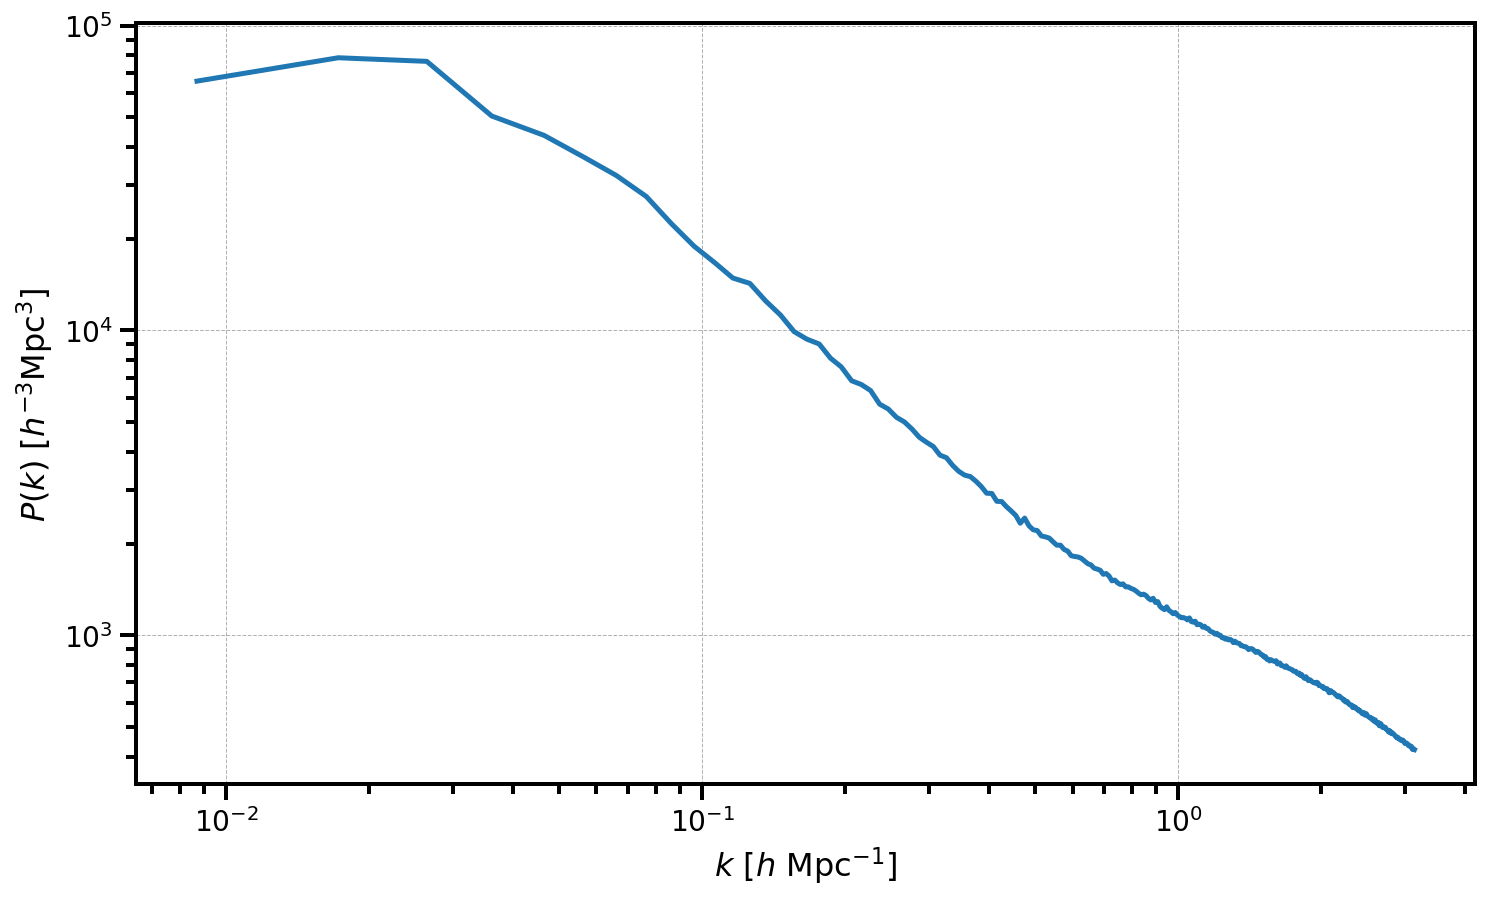

In [22]:
fig1 = plt.figure()

# print the shot noise subtracted P(k)
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
#plt.loglog(Pk['k'], Pk['power'].real)


# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
#plt.xlim(0.001, 0.6)
#plt.xlim(0.01, 10.0)
#plt.ylim(1,100000)

fig1.savefig("pofk.pdf")